In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv("insurance.csv")

# EDA

In [101]:
df.shape
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [103]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


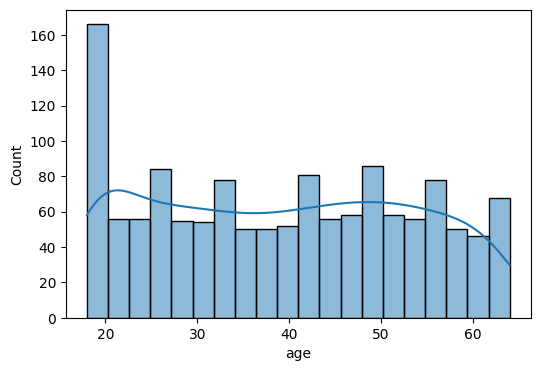

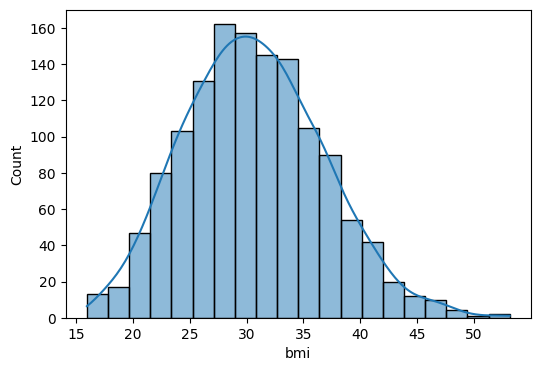

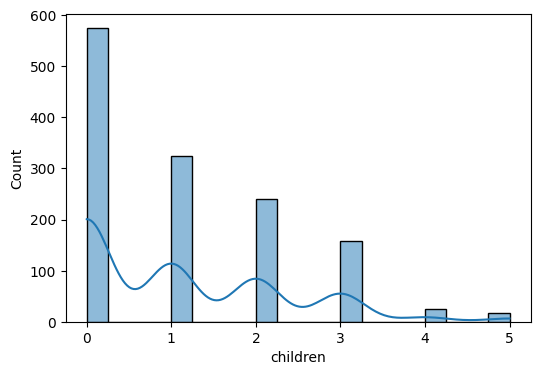

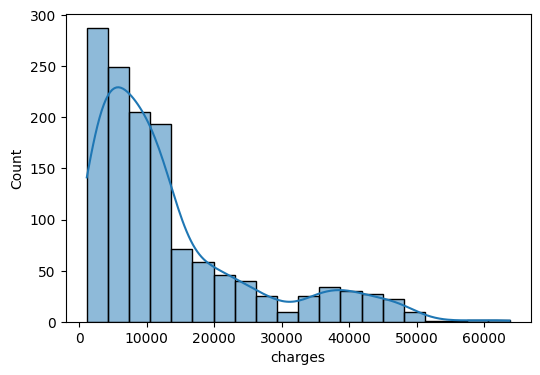

In [104]:
fig_data = df.describe()
for col in fig_data:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20)

<Axes: xlabel='sex', ylabel='count'>

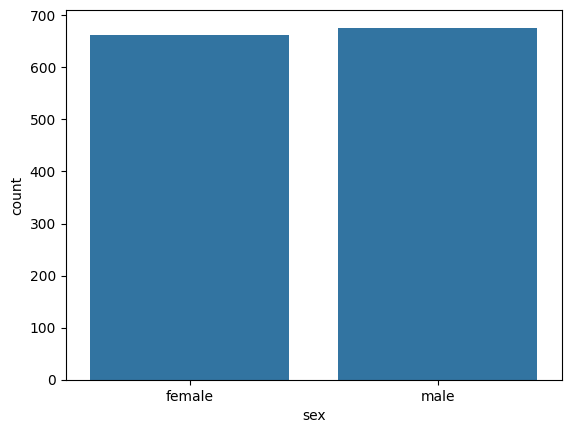

In [105]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

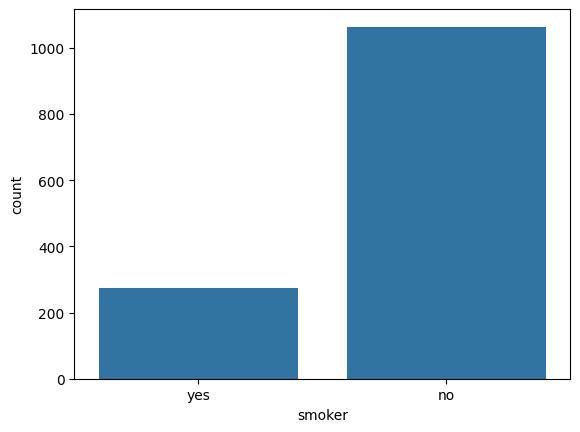

In [106]:
sns.countplot(x=df['smoker'])

<Axes: >

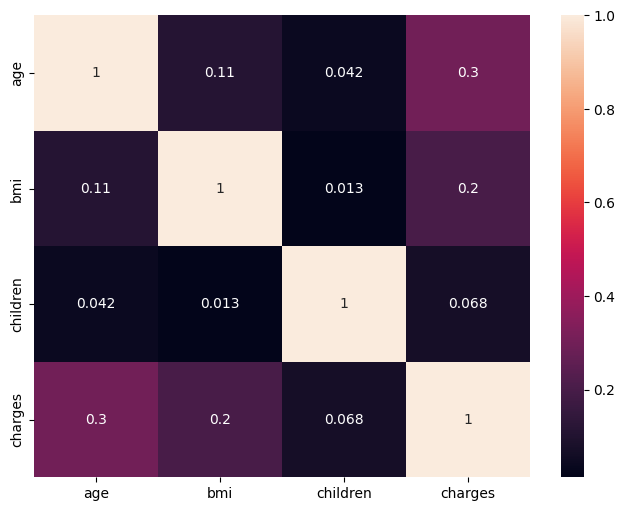

In [107]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning & Pre-Processing

In [108]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [109]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [110]:
dfc = pd.read_csv("insurance.csv")
dfc['sex'] = dfc['sex'].map({"male" : 0 , "female" : 1 })
dfc['smoker'] = dfc['smoker'].map({"yes" : 1 , "no" : 0})
dfc

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [111]:
dfc.rename(columns={
    "sex" : "is_female",
    "smoker" : "is_smoker"
}, inplace = True)
dfc

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [112]:
dfc['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [113]:
dfc

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


# Feature Engineeing & Extraction 


<Axes: xlabel='bmi', ylabel='Count'>

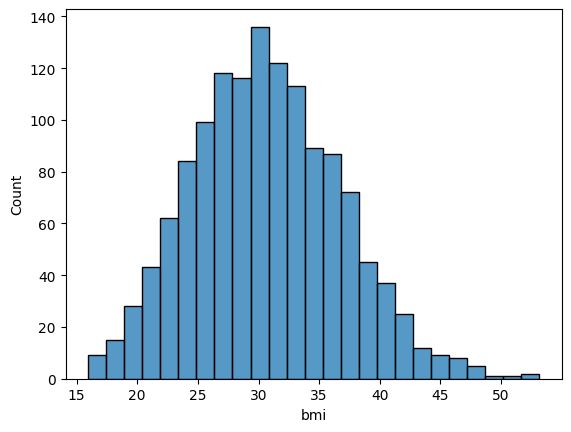

In [114]:
sns.histplot(df['bmi'])

In [ ]:
dfc = pd.get_dummies(dfc,columns=["region"],drop_first=True)
dfc = dfc.astype(int)
dfc['bmi_category'] = pd.cut(
    dfc['bmi'],
    bins = [ 0 , 18.5 , 24.9 , 29.9 , float('inf')],
    labels = ['UnderWeight','Normal','OverWeight','Obese']
)
dfc = pd.get_dummies(dfc,columns=["bmi_category"],drop_first=True)
dfc = dfc.astype(int)
dfc

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [117]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 787.2 kB/s  0:00:14 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 2.6 MB/s  0:00:11m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [126]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scalar = StandardScaler()
dfc[cols] = scalar.fit_transform(dfc[cols]) 
dfc.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,1,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,1,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,1,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,1,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,1,0,0,0,1,0


# Feature Scaling 

In [128]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [131]:
from scipy.stats import pearsonr

selected_features = [
'age', 'bmi', 'children', 'is_female', 'is_smoker',
'region_northwest', 'region_southeast', 'region_southwest',
'bmi_category_Normal', 'bmi_category_OverWeight', 'bmi_category_Obese'
]

correlations = {
feature: pearsonr(dfc [feature], dfc ['charges']) [0]
for feature in selected_features
}
correlation_df = pd.DataFrame (list (correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values (by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787251
0,age,0.299009
10,bmi_category_Obese,0.199533
1,bmi,0.196188
6,region_southeast,0.073981
2,children,0.067999
5,region_northwest,-0.039905
7,region_southwest,-0.043210
3,is_female,-0.057293
8,bmi_category_Normal,-0.103679


<Axes: xlabel='is_smoker', ylabel='charges'>

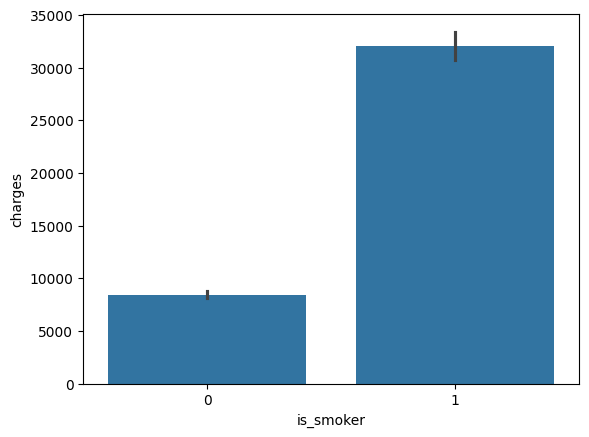

In [133]:
sns.barplot(y=dfc['charges'],x=dfc['is_smoker'])

In [151]:
from scipy.stats import chi2_contingency
import pandas as pd
alpha = 0.05
dfc ['charges_bin'] = pd.qcut(dfc ['charges'], q=4, labels=False)
chi2_results = {}

cat_features = [
'is_female', 'is_smoker',
'region_northwest', 'region_southeast', 'region_southwest',
'bmi_category_Normal', 'bmi_category_OverWeight', 'bmi_category_Obese'
]

for col in cat_features:
    contingency = pd.crosstab(dfc[col],dfc['charges_bin'])
    chi2_stat , p_val , _, _ = chi2_contingency(contingency)
    decision = "Reject Null ( Keep Feature )" if p_val < alpha else "Accept Null ( Drop Feature )"
    chi2_results[col] = {
        'chi2_statistic' : chi2_stat,
        'p_value' : p_val,
        'Decision' : decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by="p_value")
chi2_df


,chi2_statistic,p_value,Decision
is_smoker,854.020268,0.0,Reject Null ( Keep Feature )
region_southeast,15.208814,0.001647,Reject Null ( Keep Feature )
is_female,9.532132,0.022992,Reject Null ( Keep Feature )
bmi_category_Obese,8.510101,0.036566,Reject Null ( Keep Feature )
region_southwest,5.530825,0.136807,Accept Null ( Drop Feature )
bmi_category_OverWeight,4.620089,0.201826,Accept Null ( Drop Feature )
bmi_category_Normal,3.578987,0.310661,Accept Null ( Drop Feature )
region_northwest,1.226112,0.746749,Accept Null ( Drop Feature )


In [154]:
final_df = dfc[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese']]
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0
1,-1.509965,0,0.462657,-0.078767,0,1725,1,1
2,-0.797954,0,0.462657,1.580926,0,4449,1,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,0,0
